# **Traditional LSTM | Same Day Predictions | Normalized**

In [1]:
import numpy  as np
import pandas as pd

## Read In Datasets

* `msftSameDayNorm.csv`
* `appleSameDayNorm.csv`

In [2]:
aaplDf = pd.read_csv('appleSameDayNorm.csv')
msftDf = pd.read_csv('msftSameDayNorm.csv')

## Drop Attributes That Can't Be Used as Features

In [3]:
# Stock and Sentiment features

aaplDf = aaplDf.drop(columns=['Unnamed: 0'])
msftDf = msftDf.drop(columns=['Unnamed: 0'])

# Only stock Features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])

# Only Sentiment 

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'Open'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'Open'])


In [4]:
aaplDf.head()
#msftDf.head()


,Open,neg,neu,pos,compound,label
0,3.278571,0.032,0.905,0.063,0.7707,0
1,3.281429,0.011,0.904,0.085,0.8720,0
2,3.237143,0.029,0.878,0.093,0.6858,0
3,3.215357,0.091,0.869,0.040,-0.6712,0
4,3.115357,0.084,0.848,0.069,-0.1796,1


## Split into Data (`x`) and Label (`y`) Sets

In [5]:
yAppl = aaplDf['label']
xAppl = aaplDf.drop(columns = ['label'])

yMsft = msftDf['label']
xMsft = msftDf.drop(columns = ['label'])


## Split into Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split
# 90 - 10 : Train - Test Split
xTrainAppl, xTestAppl, yTrainAppl, yTestAppl = train_test_split(xAppl, yAppl, test_size=0.1, shuffle = False)
xTrainMsft, xTestMsft, yTrainMsft, yTestMsft = train_test_split(xMsft, yMsft, test_size=0.1, shuffle = False)

## Normalize the Data (`x`) Sets Using `MinMaxScaler`

In [7]:
from sklearn.preprocessing import MinMaxScaler

def scaleX(trainX, testX):
    scaler = MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX  = scaler.transform(testX)
    return trainX, testX

xTrainAppl, xTestAppl = scaleX(xTrainAppl, xTestAppl)
xTrainMsft, xTestMsft = scaleX(xTrainMsft, xTestMsft)

## Convert Label (`y`) Sets to `numpy` arrays

In [8]:
yTrainAppl = np.array(yTrainAppl.values.tolist())
yTestAppl  = np.array(yTestAppl.values.tolist())

yTrainMsft = np.array(yTrainMsft.values.tolist())
yTestMsft  = np.array(yTestMsft.values.tolist())

## Reshape Data(`x`) Sets Using `numpy`

In [9]:
xTrainAppl = np.reshape(xTrainAppl, (len(xTrainAppl) , 1 , xTrainAppl.shape[1]) ) # 5 because there are 5 features
xTestAppl  = np.reshape(xTestAppl,  (len(xTestAppl)  , 1 , xTestAppl.shape[1]) ) # 5 because there are 5 features

xTrainMsft = np.reshape(xTrainMsft, (len(xTrainMsft) , 1 , xTrainMsft.shape[1]) ) # 5 because there are 5 features
xTestMsft  = np.reshape(xTestMsft,  (len(xTestMsft)  , 1 , xTestMsft.shape[1]) ) # 5 because there are 5 features

## Traditional LSTM

In [10]:
import tensorflow   as     tf
from   tensorflow   import keras
from   keras        import Sequential
from   keras.layers import Dense
from   keras.layers import LSTM
from   keras.layers import Dropout

In [11]:
def makeLSTM(xTrain):
    model = Sequential()
    model.add (LSTM  (units = 50, activation = 'relu', input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))

    model.add (LSTM  (units = 25, activation = 'relu', return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))

    model.add (Dense (units = 1, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make LSTM for Each Set

In [12]:
applLSTM = makeLSTM(xTrainAppl)
msftLSTM = makeLSTM(xTrainMsft)

### Fit Model for Each Set

In [13]:
applHist = applLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftHist = msftLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5158 - val_loss: 0.6927 - val_accuracy: 0.5279
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5225 - val_loss: 0.6922 - val_accuracy: 0.5279
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5279
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5225 - val_loss: 0.6918 - val_accuracy: 0.5279
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5225 - val_loss: 0.6917 - val_accuracy: 0.5279
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5364 - val_loss: 0.6983 - val_accuracy: 0.5451
Epoch 60/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5344 - val_loss: 0.6983 - val_accuracy: 0.5451
Epoch 61/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5349 - val_loss: 0.6984 - val_accuracy: 0.5365
Epoch 62/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5354 - val_loss: 0.6984 - val_accuracy: 0.5451
Epoch 63/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5392 - val_loss: 0.6987 - val_accuracy: 0.5365
Epoch 64/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5364 - val_loss: 0.6986 - val_accuracy: 0.5365
Epoch 65/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5421 - val_loss: 0.6988 - val_accuracy: 0.5322
Epoch 

30/30 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5416 - val_loss: 0.7055 - val_accuracy: 0.5150
Epoch 117/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5445 - val_loss: 0.7056 - val_accuracy: 0.5193
Epoch 118/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5440 - val_loss: 0.7060 - val_accuracy: 0.5107
Epoch 119/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5455 - val_loss: 0.7060 - val_accuracy: 0.5193
Epoch 120/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5431 - val_loss: 0.7059 - val_accuracy: 0.5150
Epoch 121/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5435 - val_loss: 0.7063 - val_accuracy: 0.5107
Epoch 122/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5455 - val_loss: 0.7063 - val_accuracy: 0.5193
Epoch 123/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5488 - val_loss: 0.7120 - val_accuracy: 0.5107
Epoch 174/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5464 - val_loss: 0.7123 - val_accuracy: 0.4979
Epoch 175/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5469 - val_loss: 0.7123 - val_accuracy: 0.5107
Epoch 176/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5450 - val_loss: 0.7123 - val_accuracy: 0.5064
Epoch 177/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5474 - val_loss: 0.7128 - val_accuracy: 0.5150
Epoch 178/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5459 - val_loss: 0.7127 - val_accuracy: 0.5064
Epoch 179/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5440 - val_loss: 0.7127 - val_accuracy: 0.4979
Epoch 180/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5493 - val_loss: 0.7177 - val_accuracy: 0.5021
Epoch 231/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5526 - val_loss: 0.7173 - val_accuracy: 0.4936
Epoch 232/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5526 - val_loss: 0.7174 - val_accuracy: 0.4979
Epoch 233/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5488 - val_loss: 0.7176 - val_accuracy: 0.5064
Epoch 234/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5483 - val_loss: 0.7176 - val_accuracy: 0.4979
Epoch 235/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5522 - val_loss: 0.7177 - val_accuracy: 0.5064
Epoch 236/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5522 - val_loss: 0.7182 - val_accuracy: 0.4721
Epoch 237/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5522 - val_loss: 0.7213 - val_accuracy: 0.5107
Epoch 288/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5488 - val_loss: 0.7211 - val_accuracy: 0.4979
Epoch 289/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5560 - val_loss: 0.7212 - val_accuracy: 0.4936
Epoch 290/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5493 - val_loss: 0.7217 - val_accuracy: 0.5021
Epoch 291/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5541 - val_loss: 0.7215 - val_accuracy: 0.5064
Epoch 292/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5478 - val_loss: 0.7214 - val_accuracy: 0.5064
Epoch 293/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5545 - val_loss: 0.7213 - val_accuracy: 0.5021
Epoch 294/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5522 - val_loss: 0.7236 - val_accuracy: 0.4807
Epoch 345/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5512 - val_loss: 0.7236 - val_accuracy: 0.4721
Epoch 346/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5483 - val_loss: 0.7238 - val_accuracy: 0.4936
Epoch 347/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5502 - val_loss: 0.7244 - val_accuracy: 0.4893
Epoch 348/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5541 - val_loss: 0.7239 - val_accuracy: 0.4979
Epoch 349/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5545 - val_loss: 0.7239 - val_accuracy: 0.4979
Epoch 350/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5517 - val_loss: 0.7239 - val_accuracy: 0.4936
Epoch 351/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5536 - val_loss: 0.7258 - val_accuracy: 0.4850
Epoch 402/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5502 - val_loss: 0.7261 - val_accuracy: 0.4850
Epoch 403/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5536 - val_loss: 0.7260 - val_accuracy: 0.4807
Epoch 404/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5531 - val_loss: 0.7262 - val_accuracy: 0.4936
Epoch 405/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5574 - val_loss: 0.7253 - val_accuracy: 0.4807
Epoch 406/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5579 - val_loss: 0.7256 - val_accuracy: 0.4893
Epoch 407/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5536 - val_loss: 0.7263 - val_accuracy: 0.4979
Epoch 408/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5579 - val_loss: 0.7276 - val_accuracy: 0.4936
Epoch 459/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5531 - val_loss: 0.7270 - val_accuracy: 0.5064
Epoch 460/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5569 - val_loss: 0.7270 - val_accuracy: 0.4893
Epoch 461/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5502 - val_loss: 0.7272 - val_accuracy: 0.4764
Epoch 462/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5555 - val_loss: 0.7268 - val_accuracy: 0.4807
Epoch 463/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5565 - val_loss: 0.7268 - val_accuracy: 0.4807
Epoch 464/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5507 - val_loss: 0.7273 - val_accuracy: 0.4979
Epoch 465/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6935 - val_accuracy: 0.5111
Epoch 16/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6936 - val_accuracy: 0.5111
Epoch 17/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6936 - val_accuracy: 0.5111
Epoch 18/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6937 - val_accuracy: 0.5111
Epoch 19/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6938 - val_accuracy: 0.5111
Epoch 20/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5199 - val_loss: 0.6939 - val_accuracy: 0.5111
Epoch 21/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5199 - val_loss: 0.6940 - val_accuracy: 0.5111
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5439 - val_loss: 0.7129 - val_accuracy: 0.5037
Epoch 74/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5415 - val_loss: 0.7135 - val_accuracy: 0.5111
Epoch 75/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5423 - val_loss: 0.7140 - val_accuracy: 0.5037
Epoch 76/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5473 - val_loss: 0.7147 - val_accuracy: 0.5111
Epoch 77/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5539 - val_loss: 0.7149 - val_accuracy: 0.5037
Epoch 78/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5556 - val_loss: 0.7156 - val_accuracy: 0.5111
Epoch 79/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5547 - val_loss: 0.7164 - val_accuracy: 0.5111
Epoch 

17/17 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5622 - val_loss: 0.7367 - val_accuracy: 0.5333
Epoch 131/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5638 - val_loss: 0.7406 - val_accuracy: 0.5630
Epoch 132/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5614 - val_loss: 0.7393 - val_accuracy: 0.5481
Epoch 133/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5597 - val_loss: 0.7409 - val_accuracy: 0.5630
Epoch 134/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5605 - val_loss: 0.7412 - val_accuracy: 0.5630
Epoch 135/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5589 - val_loss: 0.7396 - val_accuracy: 0.5630
Epoch 136/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5614 - val_loss: 0.7419 - val_accuracy: 0.5556
Epoch 137/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5738 - val_loss: 0.7453 - val_accuracy: 0.5556
Epoch 188/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5705 - val_loss: 0.7487 - val_accuracy: 0.5481
Epoch 189/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5713 - val_loss: 0.7474 - val_accuracy: 0.5407
Epoch 190/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5697 - val_loss: 0.7473 - val_accuracy: 0.5481
Epoch 191/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5746 - val_loss: 0.7452 - val_accuracy: 0.5481
Epoch 192/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5713 - val_loss: 0.7481 - val_accuracy: 0.5407
Epoch 193/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5746 - val_loss: 0.7470 - val_accuracy: 0.5481
Epoch 194/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.5804 - val_loss: 0.7511 - val_accuracy: 0.5556
Epoch 245/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5821 - val_loss: 0.7529 - val_accuracy: 0.5556
Epoch 246/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5804 - val_loss: 0.7540 - val_accuracy: 0.5481
Epoch 247/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5804 - val_loss: 0.7509 - val_accuracy: 0.5556
Epoch 248/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5837 - val_loss: 0.7537 - val_accuracy: 0.5481
Epoch 249/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.5796 - val_loss: 0.7538 - val_accuracy: 0.5407
Epoch 250/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.5821 - val_loss: 0.7538 - val_accuracy: 0.5407
Epoch 251/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5862 - val_loss: 0.7570 - val_accuracy: 0.5481
Epoch 302/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5862 - val_loss: 0.7570 - val_accuracy: 0.5481
Epoch 303/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.5862 - val_loss: 0.7579 - val_accuracy: 0.5481
Epoch 304/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5871 - val_loss: 0.7568 - val_accuracy: 0.5481
Epoch 305/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5871 - val_loss: 0.7591 - val_accuracy: 0.5333
Epoch 306/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5871 - val_loss: 0.7553 - val_accuracy: 0.5556
Epoch 307/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5871 - val_loss: 0.7580 - val_accuracy: 0.5407
Epoch 308/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5887 - val_loss: 0.7580 - val_accuracy: 0.5333
Epoch 359/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5879 - val_loss: 0.7611 - val_accuracy: 0.5185
Epoch 360/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5879 - val_loss: 0.7567 - val_accuracy: 0.5333
Epoch 361/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5879 - val_loss: 0.7614 - val_accuracy: 0.5185
Epoch 362/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.5904 - val_loss: 0.7575 - val_accuracy: 0.5333
Epoch 363/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5879 - val_loss: 0.7617 - val_accuracy: 0.5185
Epoch 364/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.5887 - val_loss: 0.7578 - val_accuracy: 0.5333
Epoch 365/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.5920 - val_loss: 0.7673 - val_accuracy: 0.5111
Epoch 416/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5862 - val_loss: 0.7604 - val_accuracy: 0.5185
Epoch 417/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.5937 - val_loss: 0.7668 - val_accuracy: 0.5185
Epoch 418/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.5862 - val_loss: 0.7602 - val_accuracy: 0.5185
Epoch 419/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.5920 - val_loss: 0.7667 - val_accuracy: 0.5185
Epoch 420/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.5879 - val_loss: 0.7607 - val_accuracy: 0.5185
Epoch 421/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.5945 - val_loss: 0.7664 - val_accuracy: 0.5185
Epoch 422/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5871 - val_loss: 0.7656 - val_accuracy: 0.5185
Epoch 473/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.5945 - val_loss: 0.7676 - val_accuracy: 0.5037
Epoch 474/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5920 - val_loss: 0.7637 - val_accuracy: 0.5185
Epoch 475/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.5962 - val_loss: 0.7691 - val_accuracy: 0.5037
Epoch 476/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5879 - val_loss: 0.7624 - val_accuracy: 0.5185
Epoch 477/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.5970 - val_loss: 0.7687 - val_accuracy: 0.5037
Epoch 478/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.5904 - val_loss: 0.7627 - val_accuracy: 0.5185
Epoch 479/500

### Make Plots to Evaluate Each Model

In [14]:
import matplotlib.pyplot as plt

def makePlots(title, hist):
    train_acc   =  hist.history['accuracy']
    test_acc    =  hist.history['val_accuracy']
    train_loss  =  hist.history['loss']
    test_loss   =  hist.history['val_loss']

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 1st figure)
    plt.plot(train_acc, label = 'Training Accuracy')
    plt.plot(test_acc, label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Test Accuracy')
    plt.show()
    
    fig.savefig(title + '_accuracy.jpg')

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 2nd figure)
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(test_loss, label = 'Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Testing Loss')
    plt.show()
    
    fig.savefig(title + '_loss.jpg')
    return

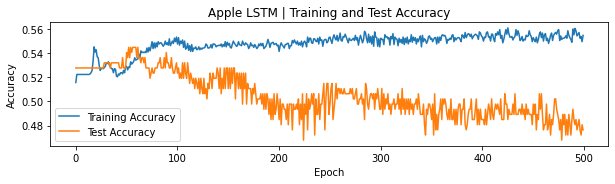

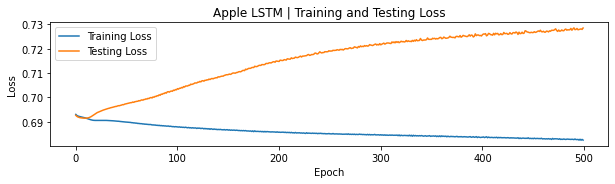

In [15]:
makePlots("Apple LSTM" , applHist)

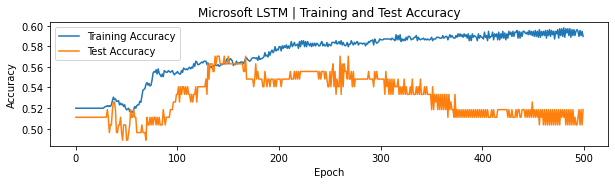

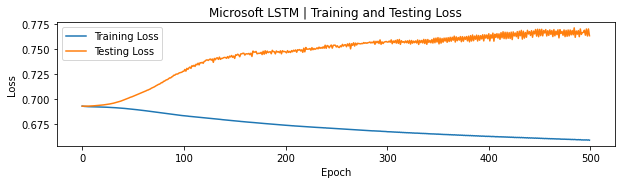

In [16]:
makePlots("Microsoft LSTM" , msftHist)

## Bidirectional LSTM

In [17]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

def makeBidirectionalLSTM(xTrain):
    model = Sequential()
    
    model.add (Bidirectional(LSTM(units =128 , activation = 'relu', return_sequences=True),
                             input_shape=(xTrain.shape[1], xTrain.shape[2])))
#     model.add(Dropout(0.25))

    model.add (Bidirectional(LSTM(units = 64, activation = 'relu', return_sequences=True)))
#     model.add(Dropout(0.25))

    model.add (TimeDistributed(Dense (units = 1, activation = 'sigmoid')))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make Bidirectional LSTM for Each Set

In [18]:
applBiLSTM = makeBidirectionalLSTM(xTrainAppl)
msftBiLSTM = makeBidirectionalLSTM(xTrainMsft)

### Fit Model for Each Set

In [19]:
applBiHist = applBiLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftBiHist = msftBiLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5279
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5225 - val_loss: 0.6917 - val_accuracy: 0.5279
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5279
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5249 - val_loss: 0.6924 - val_accuracy: 0.5279
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5469 - val_loss: 0.7078 - val_accuracy: 0.5064
Epoch 60/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5474 - val_loss: 0.7087 - val_accuracy: 0.5064
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5411 - val_loss: 0.7089 - val_accuracy: 0.5064
Epoch 62/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5483 - val_loss: 0.7091 - val_accuracy: 0.5107
Epoch 63/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5450 - val_loss: 0.7095 - val_accuracy: 0.5021
Epoch 64/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5440 - val_loss: 0.7099 - val_accuracy: 0.5064
Epoch 65/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5464 - val_loss: 0.7103 - val_accuracy: 0.5021
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5579 - val_loss: 0.7195 - val_accuracy: 0.4893
Epoch 117/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5608 - val_loss: 0.7203 - val_accuracy: 0.4936
Epoch 118/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5603 - val_loss: 0.7204 - val_accuracy: 0.4807
Epoch 119/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5603 - val_loss: 0.7203 - val_accuracy: 0.4850
Epoch 120/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5560 - val_loss: 0.7200 - val_accuracy: 0.4807
Epoch 121/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5598 - val_loss: 0.7208 - val_accuracy: 0.4850
Epoch 122/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5569 - val_loss: 0.7203 - val_accuracy: 0.4764
Epoch 123/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5742 - val_loss: 0.7234 - val_accuracy: 0.4764
Epoch 174/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5794 - val_loss: 0.7233 - val_accuracy: 0.4893
Epoch 175/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5775 - val_loss: 0.7219 - val_accuracy: 0.4979
Epoch 176/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5718 - val_loss: 0.7245 - val_accuracy: 0.5021
Epoch 177/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5770 - val_loss: 0.7224 - val_accuracy: 0.4678
Epoch 178/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5703 - val_loss: 0.7227 - val_accuracy: 0.4678
Epoch 179/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5713 - val_loss: 0.7227 - val_accuracy: 0.4635
Epoch 180/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5823 - val_loss: 0.7278 - val_accuracy: 0.4893
Epoch 231/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.5799 - val_loss: 0.7256 - val_accuracy: 0.4893
Epoch 232/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5775 - val_loss: 0.7264 - val_accuracy: 0.4936
Epoch 233/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5847 - val_loss: 0.7256 - val_accuracy: 0.4893
Epoch 234/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5823 - val_loss: 0.7265 - val_accuracy: 0.4936
Epoch 235/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.5866 - val_loss: 0.7270 - val_accuracy: 0.5107
Epoch 236/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.5799 - val_loss: 0.7271 - val_accuracy: 0.5150
Epoch 237/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.5938 - val_loss: 0.7320 - val_accuracy: 0.5064
Epoch 288/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.5952 - val_loss: 0.7340 - val_accuracy: 0.5064
Epoch 289/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.5900 - val_loss: 0.7306 - val_accuracy: 0.5064
Epoch 290/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5933 - val_loss: 0.7331 - val_accuracy: 0.5064
Epoch 291/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6618 - accuracy: 0.5976 - val_loss: 0.7318 - val_accuracy: 0.5193
Epoch 292/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.5943 - val_loss: 0.7329 - val_accuracy: 0.5021
Epoch 293/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5990 - val_loss: 0.7318 - val_accuracy: 0.5064
Epoch 294/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.5995 - val_loss: 0.7401 - val_accuracy: 0.4764
Epoch 345/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6014 - val_loss: 0.7403 - val_accuracy: 0.4850
Epoch 346/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6067 - val_loss: 0.7409 - val_accuracy: 0.4893
Epoch 347/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6005 - val_loss: 0.7413 - val_accuracy: 0.4850
Epoch 348/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6024 - val_loss: 0.7402 - val_accuracy: 0.4850
Epoch 349/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6048 - val_loss: 0.7411 - val_accuracy: 0.4936
Epoch 350/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6096 - val_loss: 0.7401 - val_accuracy: 0.4893
Epoch 351/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6096 - val_loss: 0.7469 - val_accuracy: 0.4979
Epoch 402/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6077 - val_loss: 0.7479 - val_accuracy: 0.4893
Epoch 403/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6000 - val_loss: 0.7485 - val_accuracy: 0.4850
Epoch 404/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.6048 - val_loss: 0.7495 - val_accuracy: 0.4764
Epoch 405/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6057 - val_loss: 0.7482 - val_accuracy: 0.4764
Epoch 406/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6081 - val_loss: 0.7490 - val_accuracy: 0.4635
Epoch 407/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6091 - val_loss: 0.7477 - val_accuracy: 0.4721
Epoch 408/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6144 - val_loss: 0.7549 - val_accuracy: 0.4635
Epoch 459/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6139 - val_loss: 0.7522 - val_accuracy: 0.4678
Epoch 460/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6139 - val_loss: 0.7540 - val_accuracy: 0.4807
Epoch 461/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6201 - val_loss: 0.7540 - val_accuracy: 0.4807
Epoch 462/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6244 - val_loss: 0.7553 - val_accuracy: 0.4936
Epoch 463/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6196 - val_loss: 0.7545 - val_accuracy: 0.4893
Epoch 464/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6187 - val_loss: 0.7571 - val_accuracy: 0.4807
Epoch 465/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5207 - val_loss: 0.6955 - val_accuracy: 0.5259
Epoch 16/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5224 - val_loss: 0.6959 - val_accuracy: 0.5037
Epoch 17/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5216 - val_loss: 0.6964 - val_accuracy: 0.5037
Epoch 18/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5216 - val_loss: 0.6968 - val_accuracy: 0.5037
Epoch 19/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5257 - val_loss: 0.6972 - val_accuracy: 0.5185
Epoch 20/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5299 - val_loss: 0.6977 - val_accuracy: 0.5185
Epoch 21/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5282 - val_loss: 0.6981 - val_accuracy: 0.5185
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5713 - val_loss: 0.7440 - val_accuracy: 0.5111
Epoch 74/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5638 - val_loss: 0.7379 - val_accuracy: 0.5259
Epoch 75/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5680 - val_loss: 0.7433 - val_accuracy: 0.5185
Epoch 76/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5655 - val_loss: 0.7406 - val_accuracy: 0.5259
Epoch 77/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5672 - val_loss: 0.7460 - val_accuracy: 0.5259
Epoch 78/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5663 - val_loss: 0.7442 - val_accuracy: 0.5259
Epoch 79/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5688 - val_loss: 0.7454 - val_accuracy: 0.5185
Epoch 

17/17 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.5896 - val_loss: 0.7926 - val_accuracy: 0.5259
Epoch 131/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.5871 - val_loss: 0.7857 - val_accuracy: 0.5259
Epoch 132/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.5904 - val_loss: 0.7945 - val_accuracy: 0.5333
Epoch 133/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.5920 - val_loss: 0.7895 - val_accuracy: 0.5259
Epoch 134/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.5937 - val_loss: 0.7970 - val_accuracy: 0.5407
Epoch 135/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.5896 - val_loss: 0.7952 - val_accuracy: 0.5111
Epoch 136/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.5912 - val_loss: 0.7995 - val_accuracy: 0.5556
Epoch 137/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.5995 - val_loss: 0.8129 - val_accuracy: 0.5630
Epoch 188/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6497 - accuracy: 0.5929 - val_loss: 0.8242 - val_accuracy: 0.5185
Epoch 189/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.5987 - val_loss: 0.8025 - val_accuracy: 0.5407
Epoch 190/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.5896 - val_loss: 0.8343 - val_accuracy: 0.5259
Epoch 191/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6012 - val_loss: 0.8292 - val_accuracy: 0.5556
Epoch 192/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.5954 - val_loss: 0.8197 - val_accuracy: 0.5630
Epoch 193/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.5821 - val_loss: 0.8334 - val_accuracy: 0.5333
Epoch 194/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.6177 - val_loss: 0.8696 - val_accuracy: 0.5333
Epoch 245/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.6128 - val_loss: 0.8785 - val_accuracy: 0.5333
Epoch 246/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.6153 - val_loss: 0.8760 - val_accuracy: 0.5259
Epoch 247/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6103 - val_loss: 0.8796 - val_accuracy: 0.5407
Epoch 248/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6136 - val_loss: 0.8729 - val_accuracy: 0.5407
Epoch 249/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6390 - accuracy: 0.6061 - val_loss: 0.8849 - val_accuracy: 0.5407
Epoch 250/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6103 - val_loss: 0.8757 - val_accuracy: 0.5556
Epoch 251/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6003 - val_loss: 0.8654 - val_accuracy: 0.5333
Epoch 302/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6061 - val_loss: 0.7907 - val_accuracy: 0.5407
Epoch 303/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.5995 - val_loss: 0.8667 - val_accuracy: 0.5407
Epoch 304/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.6061 - val_loss: 0.7951 - val_accuracy: 0.5481
Epoch 305/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.5954 - val_loss: 0.8668 - val_accuracy: 0.5407
Epoch 306/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6119 - val_loss: 0.8022 - val_accuracy: 0.5259
Epoch 307/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.5978 - val_loss: 0.8707 - val_accuracy: 0.5407
Epoch 308/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6003 - val_loss: 0.9179 - val_accuracy: 0.5259
Epoch 359/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.6144 - val_loss: 0.9153 - val_accuracy: 0.5481
Epoch 360/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6227 - val_loss: 0.8872 - val_accuracy: 0.5111
Epoch 361/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6070 - val_loss: 0.9163 - val_accuracy: 0.5407
Epoch 362/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.6144 - val_loss: 0.8593 - val_accuracy: 0.5111
Epoch 363/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6036 - val_loss: 0.9013 - val_accuracy: 0.5111
Epoch 364/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6136 - val_loss: 0.8919 - val_accuracy: 0.5259
Epoch 365/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.6318 - val_loss: 0.9207 - val_accuracy: 0.5407
Epoch 416/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.6269 - val_loss: 0.9241 - val_accuracy: 0.5407
Epoch 417/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.6227 - val_loss: 0.9339 - val_accuracy: 0.5630
Epoch 418/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.6277 - val_loss: 0.9080 - val_accuracy: 0.5407
Epoch 419/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.6128 - val_loss: 0.9391 - val_accuracy: 0.5407
Epoch 420/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6158 - accuracy: 0.6294 - val_loss: 0.9256 - val_accuracy: 0.5556
Epoch 421/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.6177 - val_loss: 0.9313 - val_accuracy: 0.5556
Epoch 422/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.6385 - val_loss: 0.9272 - val_accuracy: 0.5407
Epoch 473/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.6211 - val_loss: 0.9707 - val_accuracy: 0.5259
Epoch 474/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6294 - val_loss: 0.9410 - val_accuracy: 0.5481
Epoch 475/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.6153 - val_loss: 0.9649 - val_accuracy: 0.5333
Epoch 476/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.6318 - val_loss: 0.9747 - val_accuracy: 0.5259
Epoch 477/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.6310 - val_loss: 0.9490 - val_accuracy: 0.5333
Epoch 478/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.6294 - val_loss: 0.9793 - val_accuracy: 0.5111
Epoch 479/500

### Make Plots to Evaluate Each Model

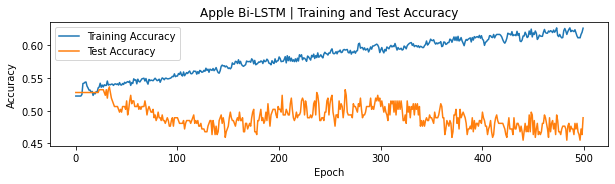

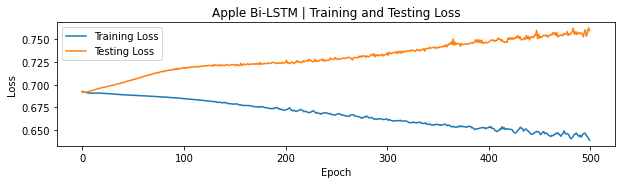

In [20]:
makePlots("Apple Bi-LSTM" , applBiHist)

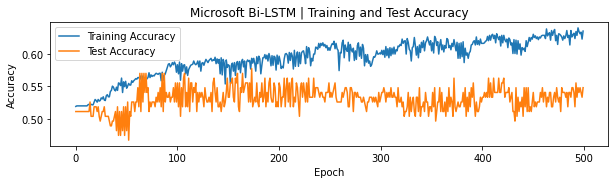

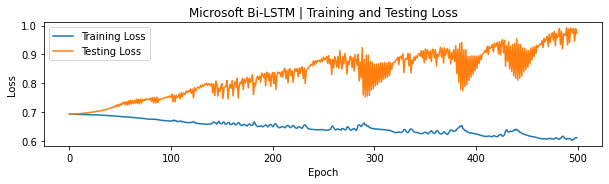

In [21]:
makePlots("Microsoft Bi-LSTM" , msftBiHist)